#               Data Analysis on Breast Cancer Dataset

GOAL  : The goal of the project is to analyze how data can be used to predict which type of breast cancer one may have.

Source :https://www.kaggle.com/datasets/pranaykankariya/breastcancer-dataset?resource=download

Description :After analysing this dataset we can implement some Machine Learning algorithm for the future predictions.
Here, Breast Cancer Tumors - A mass of abnormal tissue is known as a tumor. There are two types of tumors: benign, which are non-cancerous and malignant, which are cancerous.
1.Benign Tumors  :Benign tumors are not generally aggressive around the surrounding tissue and in some cases, may continue to grow.
2.Malignant Tumors  :Malignant tumors are aggressive and cancerous because damage the surrounding tissue and may be removed depending on the cancerous and aggressive on the severity or aggressiveness of the tumor.

In [1]:
 #Import all needed libraries
import pandas as pd    #Library used for data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    #Library used for linear algebra
import matplotlib.pyplot as plt   #The libraries required for visualization tools


In [2]:
#Loading the CSV file which contains data.
class extract:
    def fromCSV(self):
        pass
    def fromJSON(self):
        pass
    

e = extract()
dataset = e.fromCSV(file_path="data/got_chars.csv")
bc = pd.read_csv('data.csv')


In [3]:
#Displaying the content/information about the dataset 
print(bc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Display the columns in the Dataset
print(bc.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
#Display the first 5 rows in the dataset
print(bc.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [6]:
#The number of rows and columns in the dataset
print(bc.shape)

(569, 33)


In [7]:
#Here the output is diagonsis, so here display the number of Benign Tumors(B) and Malignant Tumors(M)
print(bc.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [8]:
#We are moving to cleaning stage of dataset, here we are finding is there any null value columns,using pandas function
bc.isnull().sum()



id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
bc.drop(['id'], axis=1, inplace=True)

In [10]:
print(bc.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [11]:
#Visualization Tools:
#1.Histogram
#Here, radius meanof malignant and bening tumors have been plotted in a histogram to analyze the most frequently appearing
#value, and to compare those respective values between malignant and bening tumors.

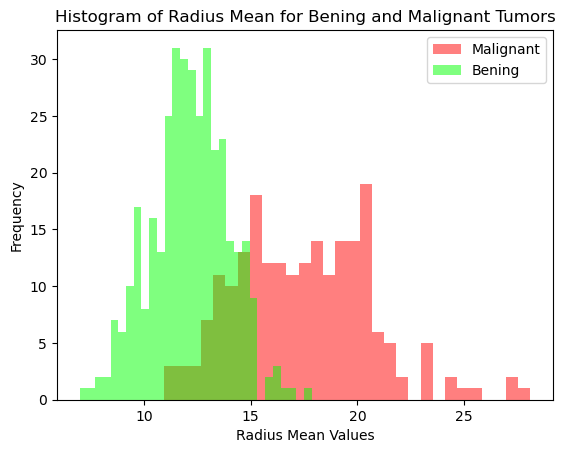

In [12]:
m = plt.hist(bc[bc["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(bc[bc["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()



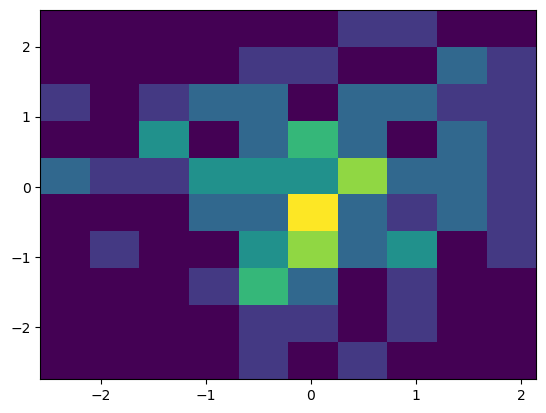

In [28]:
#2.Histogram 2-D Plot
#It groups similar values in two arrays and displays the results in a grid, using the same logic used in a scatter plot.
#Here, we compare each value in the dataset
bc = np.random.randn(2, 100)
 
plot.hist2d(bc[0], bc[1]) 
 
plot.show()

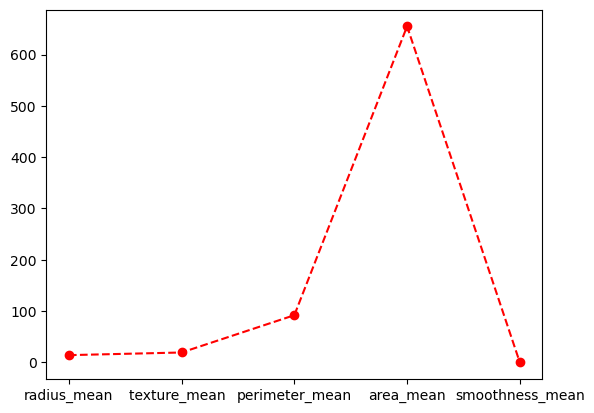

In [19]:
#3.Line Plot
#Here, we are compareing the mean of radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
x = ["radius_mean", "texture_mean  ", "perimeter_mean", "area_mean", "smoothness_mean"] # create a list with the x values 
y = [14.127292, 19.289649, 91.969033, 654.889104, 0.096360] # create a list with the y values 
 
# use the plot function within the plot module to plot a simple line plot
plot.plot(x, y,color='red', marker='o', linestyle='dashed') 
    # color: color of the line plot
    # marker: the marker used to locate the (x,y) values
    # linestyle: the line type for the line plot
    
plot.show() # display the line plot 

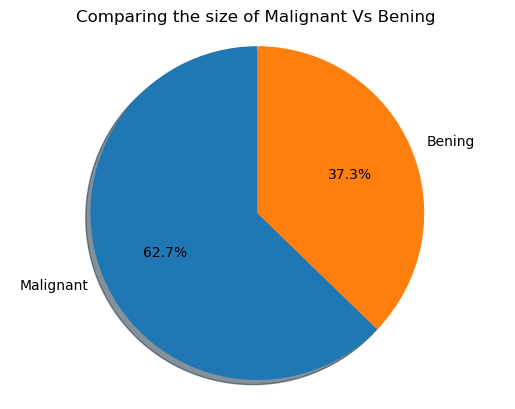

In [35]:
#4.Piechart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Malignant', 'Bening']
sizes = [357,212]
#explode = (0, .25, 0, 0])  # only "explode" the 2nd slice (i.e. 'Clothing')
 
plot.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plot.title("Comparing the size of Malignant Vs Bening ")
plot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plot.show()

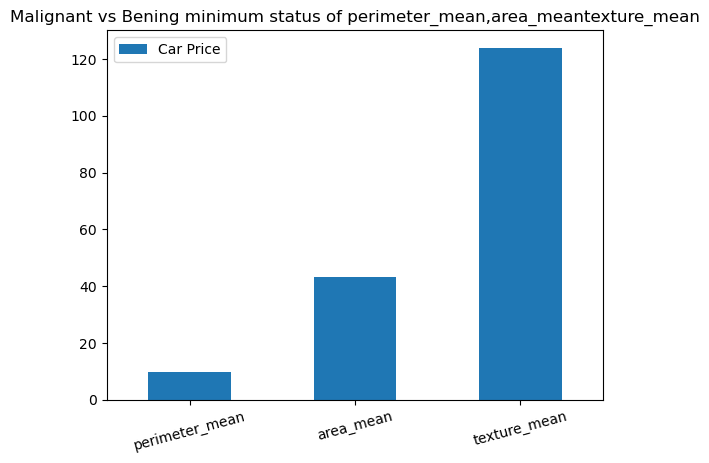

In [33]:
#5.Bar graph
# A python dictionary

data = {"Car Price":[9.710000, 43.1233, 123.90023]}
index     = ["perimeter_mean", "area_mean", "texture_mean"]      
dataFrame = pd.DataFrame(data=data, index=index);
dataFrame.plot.bar(rot=15, title="Malignant vs Bening minimum status of perimeter_mean,area_meantexture_mean");
plot.show(block=True);

Ref:https://www.engineeringbigdata.com/breast-cancer-dataset-analysis-visualization-and-machine-learning-in-python/